In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Missing Data completely at random

In [2]:
df = pd.read_csv('titanic.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
df[df['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [7]:
df.Embarked.unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [8]:
df.drop([61, 829], inplace=True, axis=0)

In [9]:
df.Embarked.isnull().sum()

0

### Missing Data Not at Random

In [10]:
df.Cabin.isnull().sum()

687

In [11]:
df['Cabin_null'] = np.where(df['Cabin'].isnull(), 1, 0)

In [12]:
df[['Cabin', 'Cabin_null']].head()

,Cabin,Cabin_null
0,NaN,1
1,C85,0
2,NaN,1
3,C123,0
4,NaN,1


### Different technique of handling missing data completly at random
mean/median/mode imputation and 
random sample imputation

In [13]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_null
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


In [14]:
### Median Imputation

In [15]:
df1 = pd.read_csv('titanic.csv', usecols=['Age', 'Survived'])

In [16]:
df1.head()

,Survived,Age
0,0,22.0
1,1,38.0
2,1,26.0
3,1,35.0
4,0,35.0


In [17]:
df1.isnull().sum()

Survived      0
Age         177
dtype: int64

In [18]:
df.Age.unique()

array([22.  , 38.  , 26.  , 35.  ,   nan, 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  , 28.  ,
        8.  , 19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  ,
       49.  , 29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  ,
       16.  , 25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  ,
       71.  , 37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 ,
       51.  , 55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  ,
       45.5 , 20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  ,
       60.  , 10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  ,
       70.  , 24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

In [19]:
df.Age.mean()

29.64209269662921

In [20]:
median = df.Age.median()

In [21]:
def median_impute(df, variable, median):
    df1[variable +"_median_impute"] = df1[variable].fillna(median)

In [22]:
median_impute(df1, 'Age', median)

In [23]:
df1.head()

,Survived,Age,Age_median_impute
0,0,22.0,22.0
1,1,38.0,38.0
2,1,26.0,26.0
3,1,35.0,35.0
4,0,35.0,35.0


In [24]:
#### Lets check some statistics to see the difference or effect

In [25]:
df1.Age.std()

14.526497332334044

In [26]:
df1.Age_median_impute.std()

13.019696550973194

In [27]:
df1.Age.var()

211.0191247463081

In [28]:
df1.Age_median_impute.var()

169.51249827942328

In [29]:
### Visulaizing 

Text(0, 0.5, 'Density')

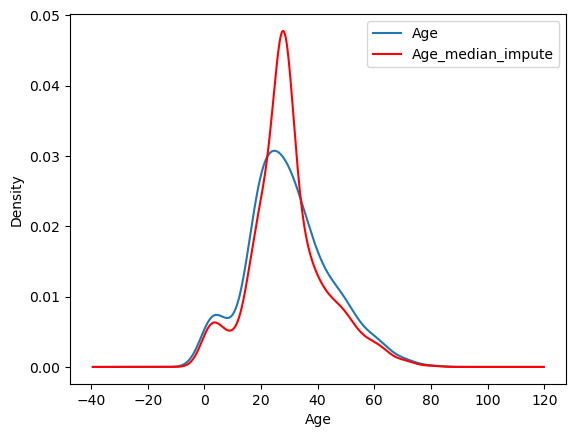

In [30]:
fig = plt.figure()
ax = fig.add_subplot(111)

df1['Age'].plot(kind='kde', ax=ax)

df1['Age_median_impute'].plot(kind='kde', ax=ax, color='red')

lines, labels = ax.get_legend_handles_labels()

ax.legend(lines, ['Age', 'Age_median_impute'], loc='best')

plt.xlabel('Age')
plt.ylabel('Density')




#### Advantages of Median imputation easy to iplement and robust to outliers and is faster to obtain the complete dataset

#### Disadvantages is high impact in origional variance and impact on corelation


### -------------------------------------------------------------------------------------------------------------

### Random Sample Imputation

##### It is used to create the random observations in the data set and replace the nan with this its is. mostly used when the data is missing completely at random

In [31]:
df2 = pd.read_csv('titanic.csv', usecols=['Age', 'Survived'])

In [32]:
df2.head()

,Survived,Age
0,0,22.0
1,1,38.0
2,1,26.0
3,1,35.0
4,0,35.0


In [33]:
df2.isnull().sum()

Survived      0
Age         177
dtype: int64

In [34]:
idx = df[df['Age'].isnull()].index

In [35]:
random_sample = df['Age'].dropna().sample(df['Age'].isnull().sum(), random_state=0)
random_sample.index

Index([423, 178, 305, 292, 592, 595, 472,  54, 456, 111,
       ...
       182,  24, 630, 458,  49, 539, 267, 503, 100, 268],
      dtype='int64', length=177)

In [36]:
median = df2.Age.median()

In [37]:
def random_sample_impute(df, variable, median):
    df2[variable+"_median_impute"] = df2[variable].fillna(median)
    df2[variable+"_random"] = df2[variable]
    
    random_sample = df2[variable].dropna().sample(df[variable].isnull().sum(), random_state=0)
    random_sample.index = df2[df2[variable].isnull()].index
    df2[variable+"_random"] = df2[variable].fillna(random_sample)

In [38]:
random_sample_impute(df2, 'Age', median)

In [39]:
df2

,Survived,Age,Age_median_impute,Age_random
0,0,22.0,22.0,22.0
1,1,38.0,38.0,38.0
2,1,26.0,26.0,26.0
3,1,35.0,35.0,35.0
4,0,35.0,35.0,35.0
...,...,...,...,...
886,0,27.0,27.0,27.0
887,1,19.0,19.0,19.0
888,0,NaN,28.0,15.0
889,1,26.0,26.0,26.0


In [40]:
#### visualizations and statistics

In [41]:
df2.Age.std()

14.526497332334044

In [42]:
df2.Age_random.std()

14.5636540895687

In [43]:
df2.Age.std()

14.526497332334044

In [44]:
df2.Age_random.std()

14.5636540895687

Text(0, 0.5, 'Density')

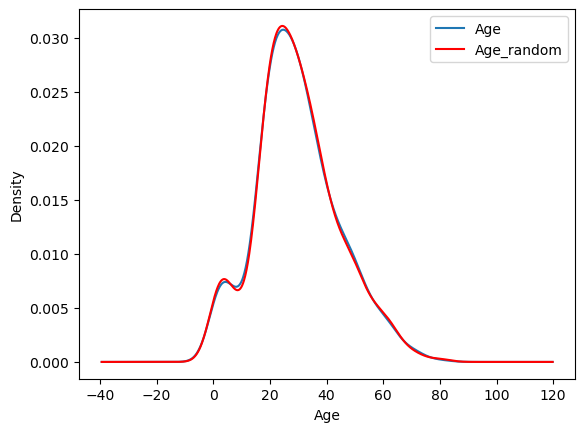

In [45]:
fig = plt.figure()
ax = fig.add_subplot(111)

df2['Age'].plot(kind='kde', ax=ax)

df2['Age_random'].plot(kind='kde', ax=ax, color='red')

lines, labels = ax.get_legend_handles_labels()

ax.legend(lines, ['Age', 'Age_random'], loc='best')

plt.xlabel('Age')
plt.ylabel('Density')

###### It is easy to implement and use, less distortion in the origional varianvce but it wont work in every situation

### Capturing NAN values with a new feature

In [46]:
df3 = pd.read_csv('titanic.csv', usecols=['Survived', 'Fare', 'Age'])

In [47]:
df3.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [48]:
df3["Age_NaN"] = np.where(df3['Age'].isnull(), 1, 0)

In [49]:
df3

,Survived,Age,Fare,Age_NaN
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0
...,...,...,...,...
886,0,27.0,13.0000,0
887,1,19.0,30.0000,0
888,0,NaN,23.4500,1
889,1,26.0,30.0000,0


In [50]:
median = df3.Age.median()

In [51]:
df3['Age'].fillna(median, inplace=True)

In [52]:
df3

,Survived,Age,Fare,Age_NaN
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0
...,...,...,...,...
886,0,27.0,13.0000,0
887,1,19.0,30.0000,0
888,0,28.0,23.4500,1
889,1,26.0,30.0000,0


###### It is easy to implement and capturte the importance of missing values but at the same time it creating one extra column in the dataframe which can create the curse of dimensionality

## End of distribution imputation

In [53]:
df4 = pd.read_csv('titanic.csv', usecols=['Survived', 'Fare', 'Age'])

In [54]:
df4.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [55]:
df4.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

<Axes: xlabel='Age', ylabel='Count'>

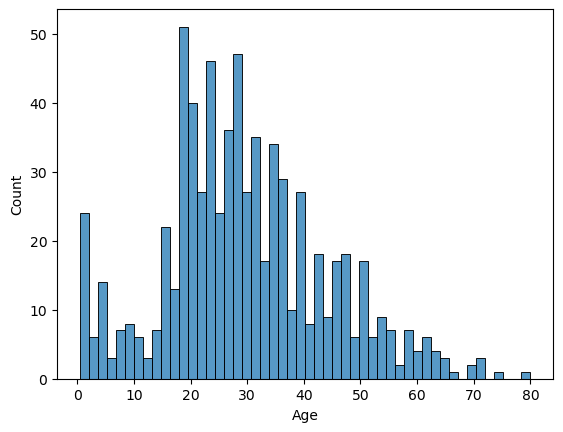

In [56]:
sns.histplot(data = df.Age, bins=50)

<Axes: >

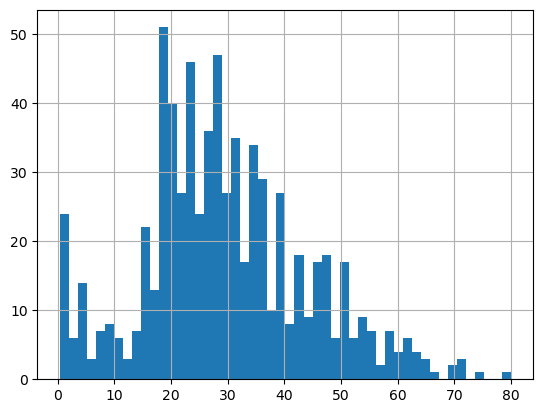

In [57]:
df.Age.hist(bins=50)

In [58]:
#### for the end of distibution we have to take the extreme value 

extreme = df.Age.mean() + 3 * df.Age.std()
extreme

73.12089139759976

In [59]:
median = df.Age.median()

In [60]:
def end_dist_impute(df, variable, median):
    df[variable+"_end_dist_impute"] = df[variable].fillna(extreme)
    df[variable].fillna(median, inplace=True)

In [61]:
end_dist_impute(df4, 'Age', median)

In [62]:
df4

,Survived,Age,Fare,Age_end_dist_impute
0,0,22.0,7.2500,22.000000
1,1,38.0,71.2833,38.000000
2,1,26.0,7.9250,26.000000
3,1,35.0,53.1000,35.000000
4,0,35.0,8.0500,35.000000
...,...,...,...,...
886,0,27.0,13.0000,27.000000
887,1,19.0,30.0000,19.000000
888,0,28.0,23.4500,73.120891
889,1,26.0,30.0000,26.000000


Text(0, 0.5, 'Density')

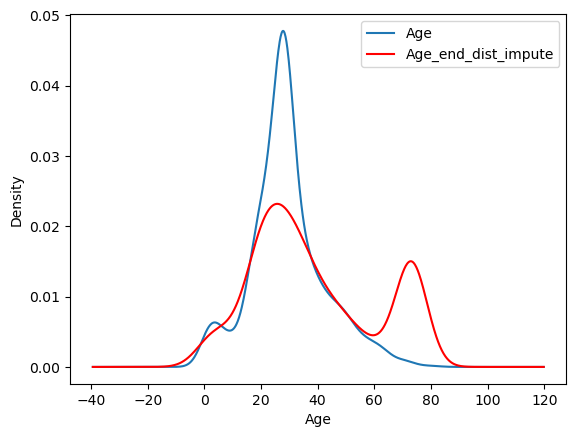

In [63]:
fig = plt.figure()
ax = fig.add_subplot(111)

df4['Age'].plot(kind='kde', ax=ax)

df4['Age_end_dist_impute'].plot(kind='kde', ax=ax, color='red')

lines, labels = ax.get_legend_handles_labels()

ax.legend(lines, ['Age', 'Age_end_dist_impute'], loc='best')

plt.xlabel('Age')
plt.ylabel('Density')

<Axes: >

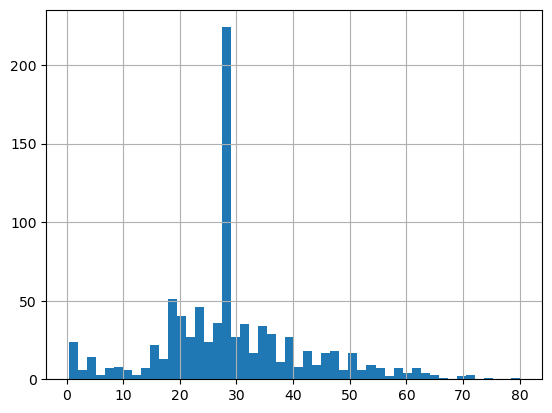

In [64]:
df4.Age.hist(bins=50)

<Axes: >

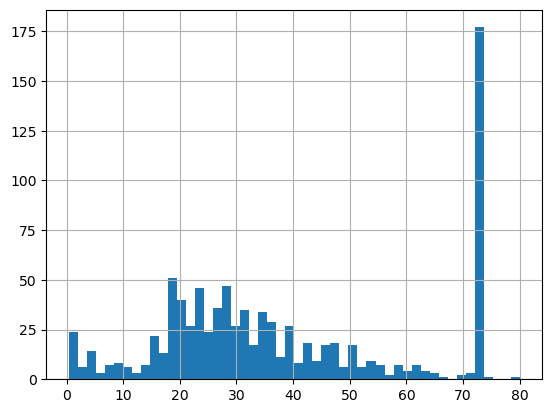

In [65]:
df4.Age_end_dist_impute.hist(bins=50)

<Axes: >

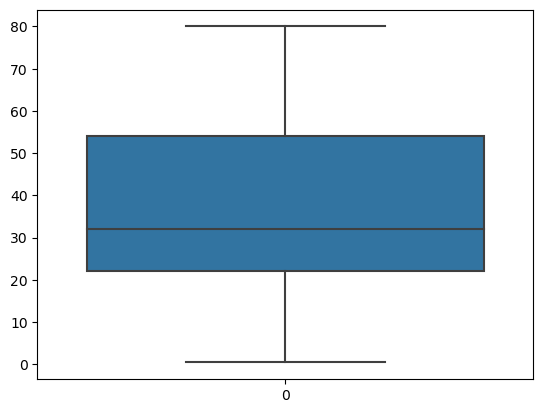

In [68]:
sns.boxplot(df4.Age_end_dist_impute)


<Axes: xlabel='Age_end_dist_impute'>

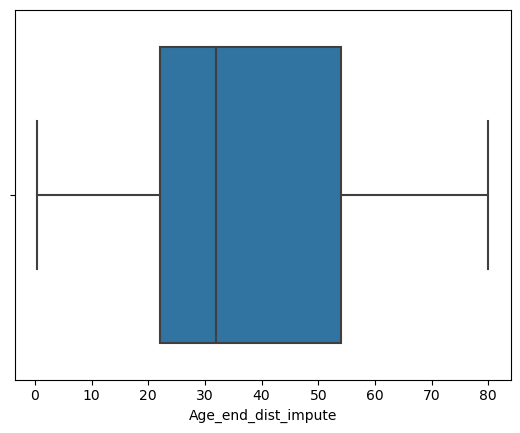

In [69]:
sns.boxplot(x='Age_end_dist_impute', data=df4)


###### Advantages: Simple implementation and preservation of data distribution.
###### Disadvantages: Sensitivity to outliers and potential overestimation or underestimation of values.

### Arbitrary value Imputation

In [4]:
df5 = pd.read_csv('titanic.csv', usecols=['Survived', 'Fare', 'Age'])

In [5]:
df5.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [6]:
df5.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

<Axes: >

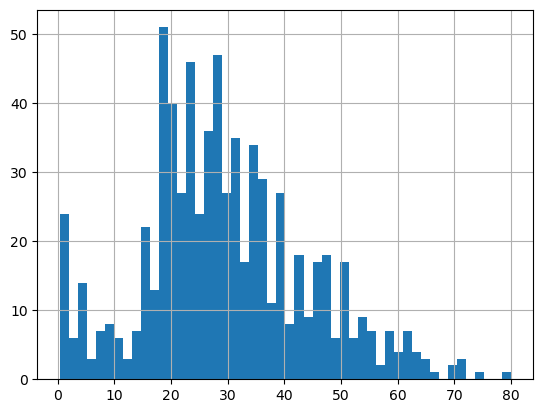

In [8]:
df5.Age.hist(bins=50)

In [9]:
### let implement the arbitrary imputation 

def arbitrary_value_impute(df, variable):
    df[variable+"_low_arbitrary_val"] = df[variable].fillna(0)
    df[variable+"_high_arbitrary_val"] = df5[variable].fillna(100)

In [10]:
arbitrary_value_impute(df5, 'Age')

In [11]:
df5.head()

,Survived,Age,Fare,Age_low_arbitrary_val,Age_high_arbitrary_val
0,0,22.0,7.2500,22.0,22.0
1,1,38.0,71.2833,38.0,38.0
2,1,26.0,7.9250,26.0,26.0
3,1,35.0,53.1000,35.0,35.0
4,0,35.0,8.0500,35.0,35.0


<Axes: >

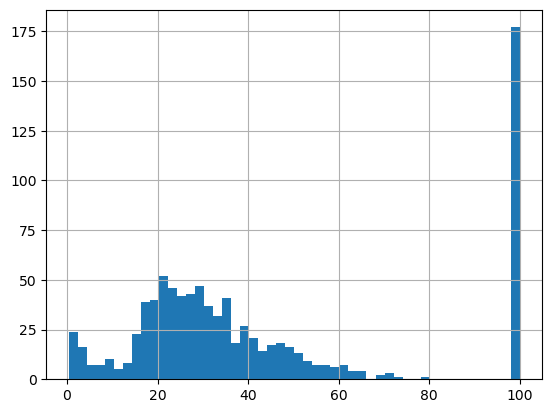

In [12]:
df5.Age_high_arbitrary_val.hist(bins=50)

<Axes: >

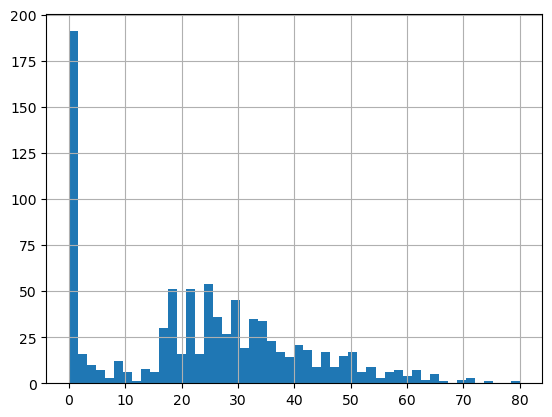

In [13]:
df5.Age_low_arbitrary_val.hist(bins=50)

Text(0, 0.5, 'Density')

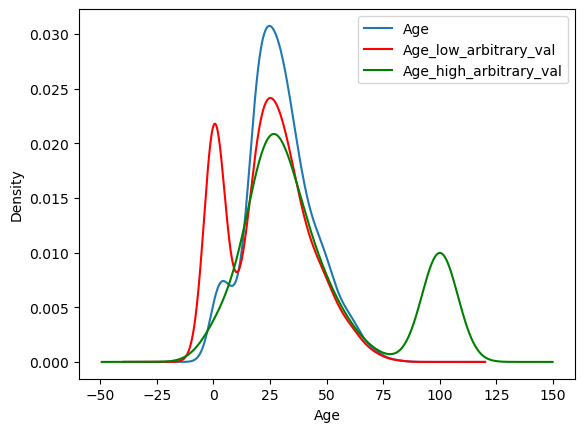

In [15]:
fig = plt.figure()
ax = fig.add_subplot(111)

df5['Age'].plot(kind='kde', ax=ax)

df5['Age_low_arbitrary_val'].plot(kind='kde', ax=ax, color='red')

df5['Age_high_arbitrary_val'].plot(kind='kde', ax=ax, color='green')

lines, labels = ax.get_legend_handles_labels()

ax.legend(lines, ['Age', 'Age_low_arbitrary_val', 'Age_high_arbitrary_val'], loc='best')

plt.xlabel('Age')
plt.ylabel('Density')

#### Advantages
##### Easy to implement and Captures the importance of missingess if there is one
#### Disadvantages
##### Distorts the original distribution of the variable and Hard to decide which value to use

##### -------------------------------------------------------------------------------------------------------------------------------------------------------------------

## Categorical Missing Values

### Frequent Category Imputation

In [2]:
df = pd.read_csv('house.csv', usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])

In [3]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [4]:
df.isnull().sum()

BsmtQual        37
FireplaceQu    690
GarageType      81
SalePrice        0
dtype: int64

In [5]:
df.isnull().mean()

BsmtQual       0.025342
FireplaceQu    0.472603
GarageType     0.055479
SalePrice      0.000000
dtype: float64

<Axes: xlabel='BsmtQual'>

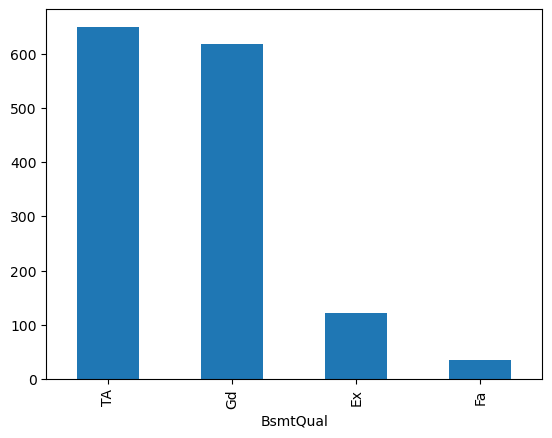

In [9]:
df.BsmtQual.value_counts().plot.bar()

<Axes: xlabel='FireplaceQu'>

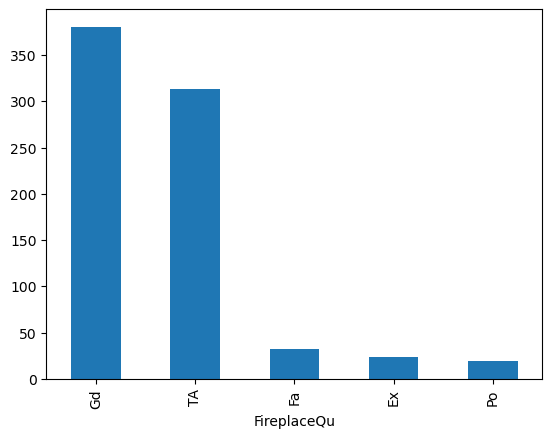

In [10]:
df.FireplaceQu.value_counts().plot.bar()

<Axes: xlabel='GarageType'>

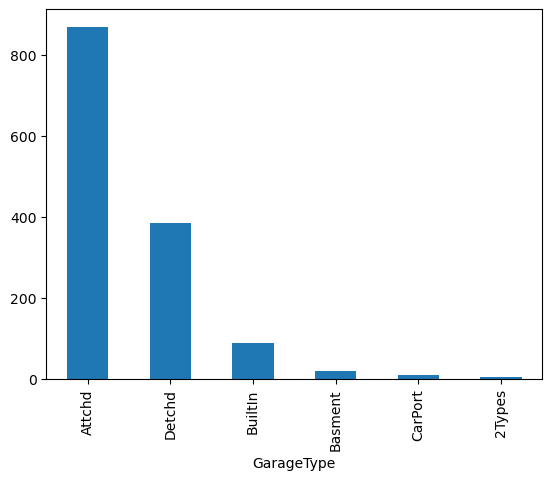

In [11]:
df.GarageType.value_counts().plot.bar()

In [12]:
df.mode()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,TA,Gd,Attchd,140000


In [19]:
def frequent_category_imput(df, variable):
    frequent_category = df[variable].mode()[0]
    df[variable+"_freq_catg"] = df[variable].fillna(frequent_category)
    
### we can also replace all the nan with the frequent categories with in the datafram

In [20]:
for freq_val in ['BsmtQual','FireplaceQu','GarageType']:
    frequent_category_imput(df, freq_val)

In [22]:
df

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_freq_catg,FireplaceQu_freq_catg,GarageType_freq_catg
0,Gd,NaN,Attchd,208500,Gd,Gd,Attchd
1,Gd,TA,Attchd,181500,Gd,TA,Attchd
2,Gd,TA,Attchd,223500,Gd,TA,Attchd
3,TA,Gd,Detchd,140000,TA,Gd,Detchd
4,Gd,TA,Attchd,250000,Gd,TA,Attchd
...,...,...,...,...,...,...,...
1455,Gd,TA,Attchd,175000,Gd,TA,Attchd
1456,Gd,TA,Attchd,210000,Gd,TA,Attchd
1457,TA,Gd,Attchd,266500,TA,Gd,Attchd
1458,TA,NaN,Attchd,142125,TA,Gd,Attchd


### Adding variable fopr capturing NaN in the data

In [23]:
df1 = pd.read_csv('house.csv', usecols=['BsmtQual','FireplaceQu','GarageType'])

In [24]:
df1.head()

,BsmtQual,FireplaceQu,GarageType
0,Gd,NaN,Attchd
1,Gd,TA,Attchd
2,Gd,TA,Attchd
3,TA,Gd,Detchd
4,Gd,TA,Attchd


In [25]:
df1.isnull().mean()

BsmtQual       0.025342
FireplaceQu    0.472603
GarageType     0.055479
dtype: float64

In [26]:
### let me directly imply the function

In [29]:
def freq_impute_with_new_var(df, variable):
    df[variable+"NaN_var_capture"] = np.where(df[variable].isnull(), 1, 0)
    frequent_cat = df[variable].mode()[0]
    df[variable].fillna(frequent_cat, inplace=True)

In [30]:
for var in ['BsmtQual','FireplaceQu','GarageType']:
    freq_impute_with_new_var(df1, var)

In [31]:
df1

,BsmtQual,FireplaceQu,GarageType,BsmtQualNaN_var_capture,FireplaceQuNaN_var_capture,GarageTypeNaN_var_capture
0,Gd,Gd,Attchd,0,1,0
1,Gd,TA,Attchd,0,0,0
2,Gd,TA,Attchd,0,0,0
3,TA,Gd,Detchd,0,0,0
4,Gd,TA,Attchd,0,0,0
...,...,...,...,...,...,...
1455,Gd,TA,Attchd,0,0,0
1456,Gd,TA,Attchd,0,0,0
1457,TA,Gd,Attchd,0,0,0
1458,TA,Gd,Attchd,0,1,0


In [32]:
df1.isnull().sum()

BsmtQual                      0
FireplaceQu                   0
GarageType                    0
BsmtQualNaN_var_capture       0
FireplaceQuNaN_var_capture    0
GarageTypeNaN_var_capture     0
dtype: int64

### Replacing NaN with the new categoy and Null

In [34]:
df2 = pd.read_csv('house.csv', usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])

In [35]:
df2.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [36]:
def imputer(df, variable):
    df[variable+"new_var"] = np.where(df[variable].isnull(), 'NULL', df[variable])

In [38]:
for var in ['BsmtQual','FireplaceQu','GarageType']:
    imputer(df2, var)

In [39]:
df2

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQualnew_var,FireplaceQunew_var,GarageTypenew_var
0,Gd,NaN,Attchd,208500,Gd,NULL,Attchd
1,Gd,TA,Attchd,181500,Gd,TA,Attchd
2,Gd,TA,Attchd,223500,Gd,TA,Attchd
3,TA,Gd,Detchd,140000,TA,Gd,Detchd
4,Gd,TA,Attchd,250000,Gd,TA,Attchd
...,...,...,...,...,...,...,...
1455,Gd,TA,Attchd,175000,Gd,TA,Attchd
1456,Gd,TA,Attchd,210000,Gd,TA,Attchd
1457,TA,Gd,Attchd,266500,TA,Gd,Attchd
1458,TA,NaN,Attchd,142125,TA,NULL,Attchd


In [40]:
df2 = df2.drop(['BsmtQual','FireplaceQu','GarageType'], axis=1)

In [41]:
df2

,SalePrice,BsmtQualnew_var,FireplaceQunew_var,GarageTypenew_var
0,208500,Gd,NULL,Attchd
1,181500,Gd,TA,Attchd
2,223500,Gd,TA,Attchd
3,140000,TA,Gd,Detchd
4,250000,Gd,TA,Attchd
...,...,...,...,...
1455,175000,Gd,TA,Attchd
1456,210000,Gd,TA,Attchd
1457,266500,TA,Gd,Attchd
1458,142125,TA,NULL,Attchd
